In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import pickle
IMG_SIZE = 150
X_raw = pickle.load(open("X_not_reshaped.pickle", "rb"))
y_raw = pickle.load(open("y_not_reshaped.pickle", "rb"))

In [4]:
model = tf.keras.models.load_model("64x3-CNN.model")

In [24]:
import random
import os
NO_FILES = os.path.join(os.getcwd() + "/Data/no")
YES_FILES = os.path.join(os.getcwd() + "/Data/yes")

no_test = []
yes_test = []

for i in range(5):
    no_img_name = random.choice(os.listdir(NO_FILES))
    yes_img_name = random.choice(os.listdir(YES_FILES))
    no_img = cv2.imread(os.path.join(NO_FILES, no_img_name), cv2.IMREAD_GRAYSCALE)
    yes_img = cv2.imread(os.path.join(YES_FILES, yes_img_name), cv2.IMREAD_GRAYSCALE)
    no_test.append(cv2.resize(no_img, (IMG_SIZE, IMG_SIZE)))
    yes_test.append(cv2.resize(yes_img, (IMG_SIZE, IMG_SIZE)))

In [25]:
no_test_reshape = np.array(no_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# no_test_reshape = no_test_reshape / 255.0
yes_test_reshape = np.array(yes_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# yes_test_reshape = yes_test_reshape / 255.0

In [26]:
model = tf.keras.models.load_model("64x3-CNN.model")

In [27]:
model.predict([yes_test_reshape])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [28]:
val_loss, val_accuracy = model.evaluate(no_test_reshape, np.zeros(5))

1/1 [==============================] - 0s 151ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [29]:
_, val_accuracy = model.evaluate(yes_test_reshape, np.ones(5))

1/1 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000


PREDICTION : [0.] ~ NO TUMOR


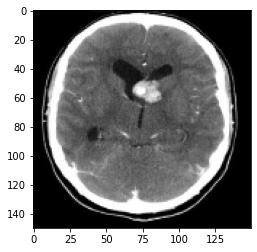

In [30]:
# Predicting No Tumor Image
plt.imshow(no_test[2], cmap = 'gray')
plt.plot()
print("PREDICTION : {} ~ NO TUMOR".format((model.predict(no_test_reshape)[2])))

PREDICTION : [1.] ~ POTENTIAL TUMOR DETECTED


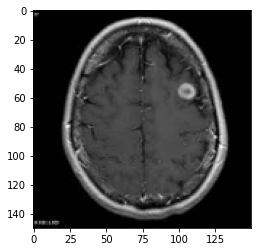

In [31]:
# Predicting a brain tumor image
plt.imshow(yes_test[0], cmap = 'gray')
plt.plot()
print("PREDICTION : {} ~ POTENTIAL TUMOR DETECTED".format((model.predict(yes_test_reshape)[0])))

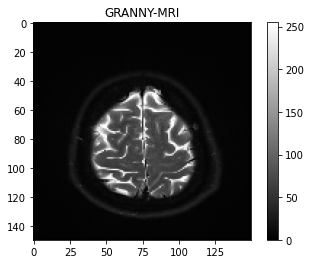

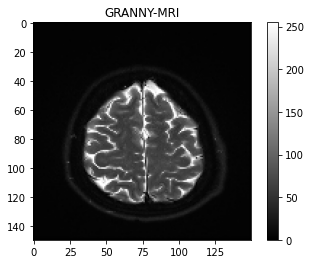

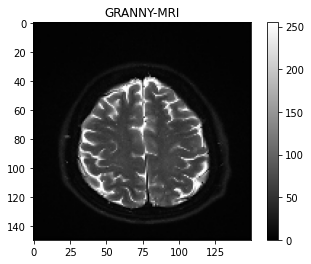

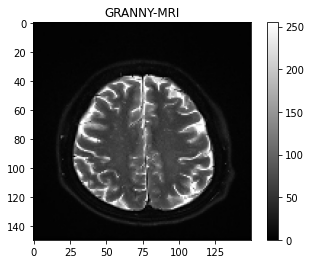

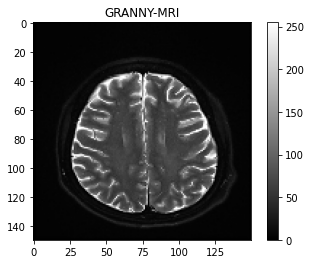

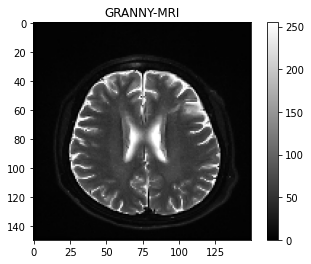

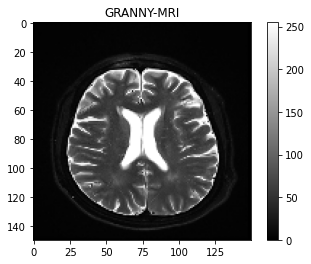

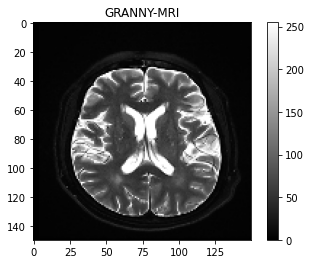

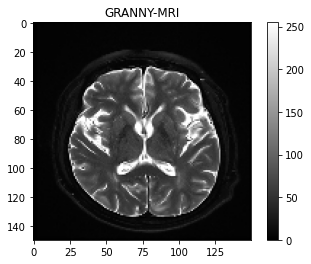

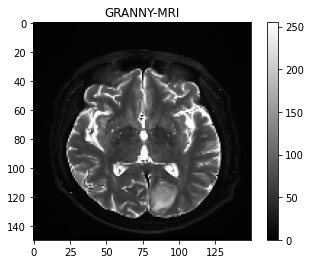

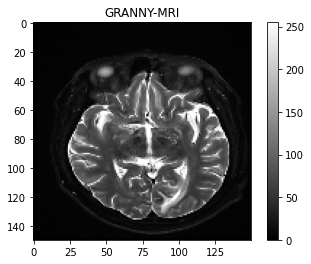

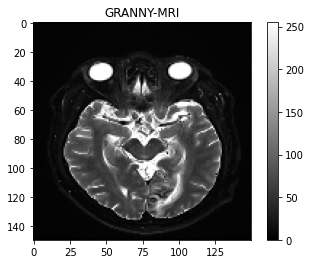

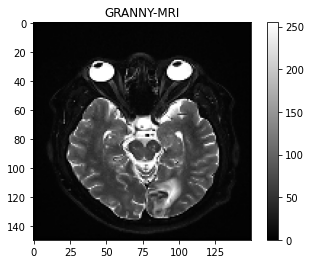

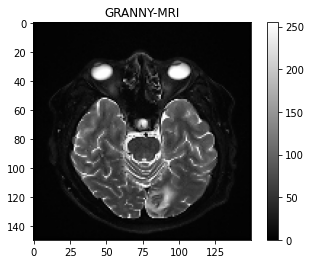

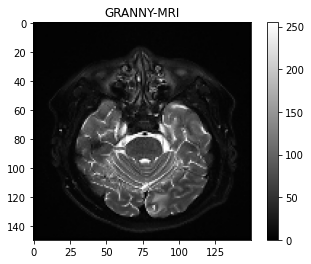

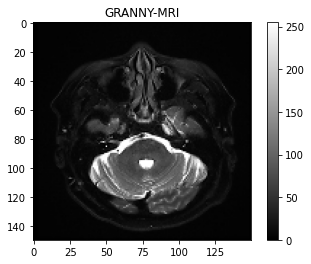

In [32]:
GRANNY_DIR = os.path.join(os.getcwd(), "Data/granny_mri_images")
granny_X_test = []
for img in os.listdir(GRANNY_DIR):
    img_arr = cv2.imread(os.path.join(GRANNY_DIR, img), cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    granny_X_test.append(new_arr)
    plt.imshow(new_arr, cmap = 'gray')
    plt.title("GRANNY-MRI")
    plt.colorbar()
    plt.show()

In [33]:
granny_X_test = np.array(granny_X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# granny_X_test = granny_X_test/255.0

In [34]:
val_loss, val_acc = model.evaluate(granny_X_test, np.zeros(len(granny_X_test)))

1/1 [==============================] - 0s 115ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [35]:
model.predict([granny_X_test])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      640       
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [6]:
import os
model.save("new-model.h5")

In [8]:
os.